In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv("DataCleaned.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,IsBadBuy,Auction,VehYear,WheelTypeID,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
Unnamed: 0,1,0.00365099,-0.000103644,-0.00143597,-0.00192872,0.00545358,-0.00276618,-0.000748595,0.00209003,0.00147002,0.00688691,0.00647489,0.003212,0.00341498,0.00640538,0.00587408,0.00372626,0.00372434,0.00319234,0.00377392
IsBadBuy,0.00365099,1,-0.0331207,-0.156716,-0.384014,0.0829748,0.0147078,0.0181241,-0.106382,-0.0998406,-0.0848313,-0.0810246,-0.106592,-0.101468,-0.10097,-0.0973474,-0.0991433,-0.00360078,0.0499758,-0.0991318
Auction,-0.000103644,-0.0331207,1,0.142104,0.0297237,-0.101383,-0.0414991,-0.0407841,0.0623661,0.0410431,0.065238,0.0470009,0.0645137,0.0443042,0.0679747,0.0500362,0.026584,-0.0190779,-0.0198349,0.0270817
VehYear,-0.00143597,-0.156716,0.142104,1,0.0916421,-0.283831,-0.0390346,-0.0623563,0.582482,0.533623,0.58239,0.539977,0.590328,0.547577,0.597615,0.557737,0.349466,0.0574001,-0.267937,0.349014
WheelTypeID,-0.00192872,-0.384014,0.0297237,0.0916421,1,-0.0610937,-0.00164505,-0.0127003,0.0120167,0.00384066,0.0147862,0.00779301,0.0149468,0.00832366,0.0205685,0.0143622,0.0015308,-0.0164806,-0.0347283,0.0017034
VehOdo,0.00545358,0.0829748,-0.101383,-0.283831,-0.0610937,1,-0.0224531,0.0669671,-0.0177534,0.0244212,0.0298356,0.0621797,-0.0294802,0.011382,0.0143248,0.0465933,-0.0637064,0.0311485,0.411411,-0.0632762
Nationality,-0.00276618,0.0147078,-0.0414991,-0.0390346,-0.00164505,-0.0224531,1,-0.018887,0.0325132,0.0183084,0.0477161,0.0388177,0.0284002,0.0139239,0.0390451,0.0318762,0.0851795,0.00419,-0.339551,0.0851849
Size,-0.000748595,0.0181241,-0.0407841,-0.0623563,-0.0127003,0.0669671,-0.018887,1,0.0377605,0.0414104,0.0291535,0.0332472,0.0367059,0.0395733,0.0236911,0.0281546,0.0709807,0.0075621,-0.0653482,0.0711432
MMRAcquisitionAuctionAveragePrice,0.00209003,-0.106382,0.0623661,0.582482,0.0120167,-0.0177534,0.0325132,0.0377605,1,0.990181,0.909885,0.909524,0.935672,0.930126,0.869293,0.868524,0.788468,0.0375626,-0.0514935,0.78831
MMRAcquisitionAuctionCleanPrice,0.00147002,-0.0998406,0.0410431,0.533623,0.00384066,0.0244212,0.0183084,0.0414104,0.990181,1,0.901993,0.917645,0.921552,0.93006,0.858328,0.868935,0.780271,0.0374675,-0.021316,0.78013


In [5]:
dcluster1=df

In [6]:
dcluster1.drop(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'Make', 'Trim', 'Color', 'Transmission', 'WheelTypeID', 'VehOdo'], axis=1, inplace =True)

In [7]:
dcluster1.drop(['Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice'], axis=1, inplace=True)

In [8]:
dcluster1.drop(['MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNST', 'IsOnlineSale'], axis=1, inplace=True)

In [9]:
df.head()

,Unnamed: 0,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost,RoundVehBCost
0,0,6796.0,6100.0,533,6100.0
1,1,5480.0,4000.0,1630,4000.0
2,2,8067.0,7500.0,693,7500.0
3,3,4817.0,4725.0,1633,4700.0
4,4,5430.0,5670.0,1623,5700.0


In [10]:
scaler = StandardScaler()
scaler.fit(dcluster1.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
dcluster1.head().values

array([[0.000e+00, 6.796e+03, 6.100e+03, 5.330e+02, 6.100e+03],
       [1.000e+00, 5.480e+03, 4.000e+03, 1.630e+03, 4.000e+03],
       [2.000e+00, 8.067e+03, 7.500e+03, 6.930e+02, 7.500e+03],
       [3.000e+00, 4.817e+03, 4.725e+03, 1.633e+03, 4.700e+03],
       [4.000e+00, 5.430e+03, 5.670e+03, 1.623e+03, 5.700e+03]])

In [12]:
scaler.transform(dcluster1.head().values)

array([[-1.41421356,  0.58004788,  0.41777513, -1.37838809,  0.41551406],
       [-0.70710678, -0.54582677, -1.3333781 ,  0.81495646, -1.32964499],
       [ 0.        ,  1.66742377,  1.58521061, -1.05848369,  1.57895343],
       [ 0.70710678, -1.11304173, -0.72881329,  0.82095467, -0.74792531],
       [ 1.41421356, -0.58860316,  0.05920566,  0.80096064,  0.08310281]])

In [13]:
scaler.inverse_transform(scaler.transform(dcluster1.head().values))

array([[0.000e+00, 6.796e+03, 6.100e+03, 5.330e+02, 6.100e+03],
       [1.000e+00, 5.480e+03, 4.000e+03, 1.630e+03, 4.000e+03],
       [2.000e+00, 8.067e+03, 7.500e+03, 6.930e+02, 7.500e+03],
       [3.000e+00, 4.817e+03, 4.725e+03, 1.633e+03, 4.700e+03],
       [4.000e+00, 5.430e+03, 5.670e+03, 1.623e+03, 5.700e+03]])

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(dcluster1.values)

In [15]:
X[:5]

array([[0.00000000e+00, 1.90246907e-01, 1.67169170e-01, 1.00909608e-02,
        1.67123288e-01],
       [1.71276869e-05, 1.53406864e-01, 1.09609692e-01, 1.66003411e-01,
        1.09589041e-01],
       [3.42553738e-05, 2.25827221e-01, 2.05542155e-01, 3.28311541e-02,
        2.05479452e-01],
       [5.13830607e-05, 1.34846873e-01, 1.29481417e-01, 1.66429790e-01,
        1.28767123e-01],
       [6.85107476e-05, 1.52007166e-01, 1.55383182e-01, 1.65008528e-01,
        1.56164384e-01]])

In [16]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.labels_[:4]

array([1, 1, 1, 1], dtype=int32)

In [18]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([11604, 11620, 11671, 11711, 11620]))

In [19]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 11604, 1: 11620, 2: 11671, 3: 11711, 4: 11620}

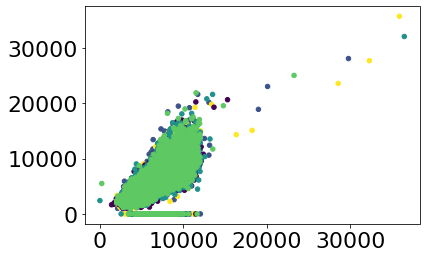

In [20]:
plt.scatter(dcluster1['VehBCost'], dcluster1['MMRAcquisitionAuctionAveragePrice'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [21]:
kmeans.cluster_centers_

array([[0.49857712, 0.16851886, 0.18288824, 0.11564036, 0.18280315],
       [0.09971677, 0.17181555, 0.18446182, 0.11395985, 0.18435715],
       [0.69849792, 0.17255295, 0.18548334, 0.11616997, 0.18538781],
       [0.89938097, 0.17193047, 0.18442893, 0.11511786, 0.18432836],
       [0.29917453, 0.17216148, 0.1843451 , 0.11701298, 0.1842431 ]])

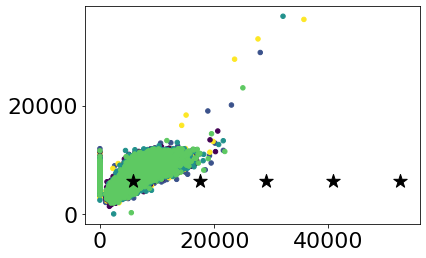

In [22]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(dcluster1['MMRAcquisitionAuctionAveragePrice'], dcluster1['VehBCost'], c=kmeans.labels_, 
           s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [23]:
print('SSE %s' % kmeans.inertia_)
#print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1160.3614540648323


In [24]:
#plt.figure(figsize=(8, 4))
#for i in range(0, len(centers)):
#    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
#plt.tick_params(axis='both', which='major', labelsize=22)
#plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
#plt.legend(fontsize=10)
#plt.show()

In [25]:
#DBSCAN


In [26]:
dbscan = DBSCAN(eps=0.03, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.03, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [27]:
dbscan.labels_[:4]

array([ 0, -1,  0,  0])

In [28]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 array([ 2578, 55221,     5,     9,     5,     9,     5,     5,     4,
            4,     5,     2,     4,     8,     4,     4,     4,     4,
            4,     4,     5,     5,     6,     4,     4,     4,     6,
            4,     4,     5,     5,    10,     8,     4,     4,     3,
            9,     4,     6,    14,     4,     3,     5,     4,     4,
            4,     6,    14,     8,     4,     3,     5,    10,     5,
            4,     4,     6,     7,    17,     7,     4,     3,     5,
            4,     5,     4,     5,     5,     5,     4,     7,     9,
            4,     9,     6,     7,     4,     3,     3,     4]))

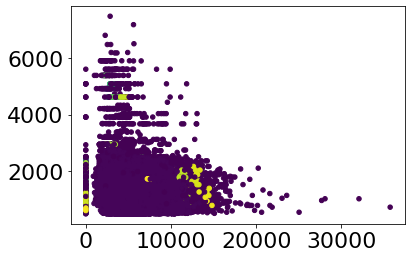

In [29]:
plt.scatter(df['MMRAcquisitionAuctionAveragePrice'], df['WarrantyCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [30]:
from scipy.spatial.distance import pdist, squareform

In [31]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

In [32]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [33]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [34]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [35]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.1, truncate_mode='lastp')